# Assignment 6:  Due Thursday 10/12

In this assignment you will become familiar with the Pandas library through the exploration of a Nobel prize data set. 

This data set was taken from the Kaggle website (https://www.kaggle.com/). If you are interested in data science and / or analysis, this website offers tons of data sets in various formats that you can access. They even post compititions that you can enter, some with money prizes awarded.

The libraries needed for this assignment are listed below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# 1a)

Read in the data set 'data/nobel.csv' into a DataFrame using Pandas .

In [2]:
inpath = %pwd
infile = inpath +'/data/nobel.csv'
print(infile)

df = pd.read_csv(infile)

/Users/noramuma/data/nobel.csv


# 1b)

Display below the output from the DataFrame functions *info*.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

# 1c)

Show the first 5 listings of the dataset.

In [4]:
df.head(5)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


# Problem 2

How many null ('NaN') values there are in each *catagory*? What is the total number of Null values in the DataFrame?

In [5]:
print('In each catagory:')
print(df.isna().sum())

In each catagory:
year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64


In [6]:
print('Total Null values:')
print(df.isna().sum().sum())

Total Null values:
1912


# Problem 3

Make a histogram of the number of nobel prizes awarded per year. Around which decade (1900, 1910, 1920, ...) were the least amount of prizes awarded?

<IPython.core.display.Javascript object>


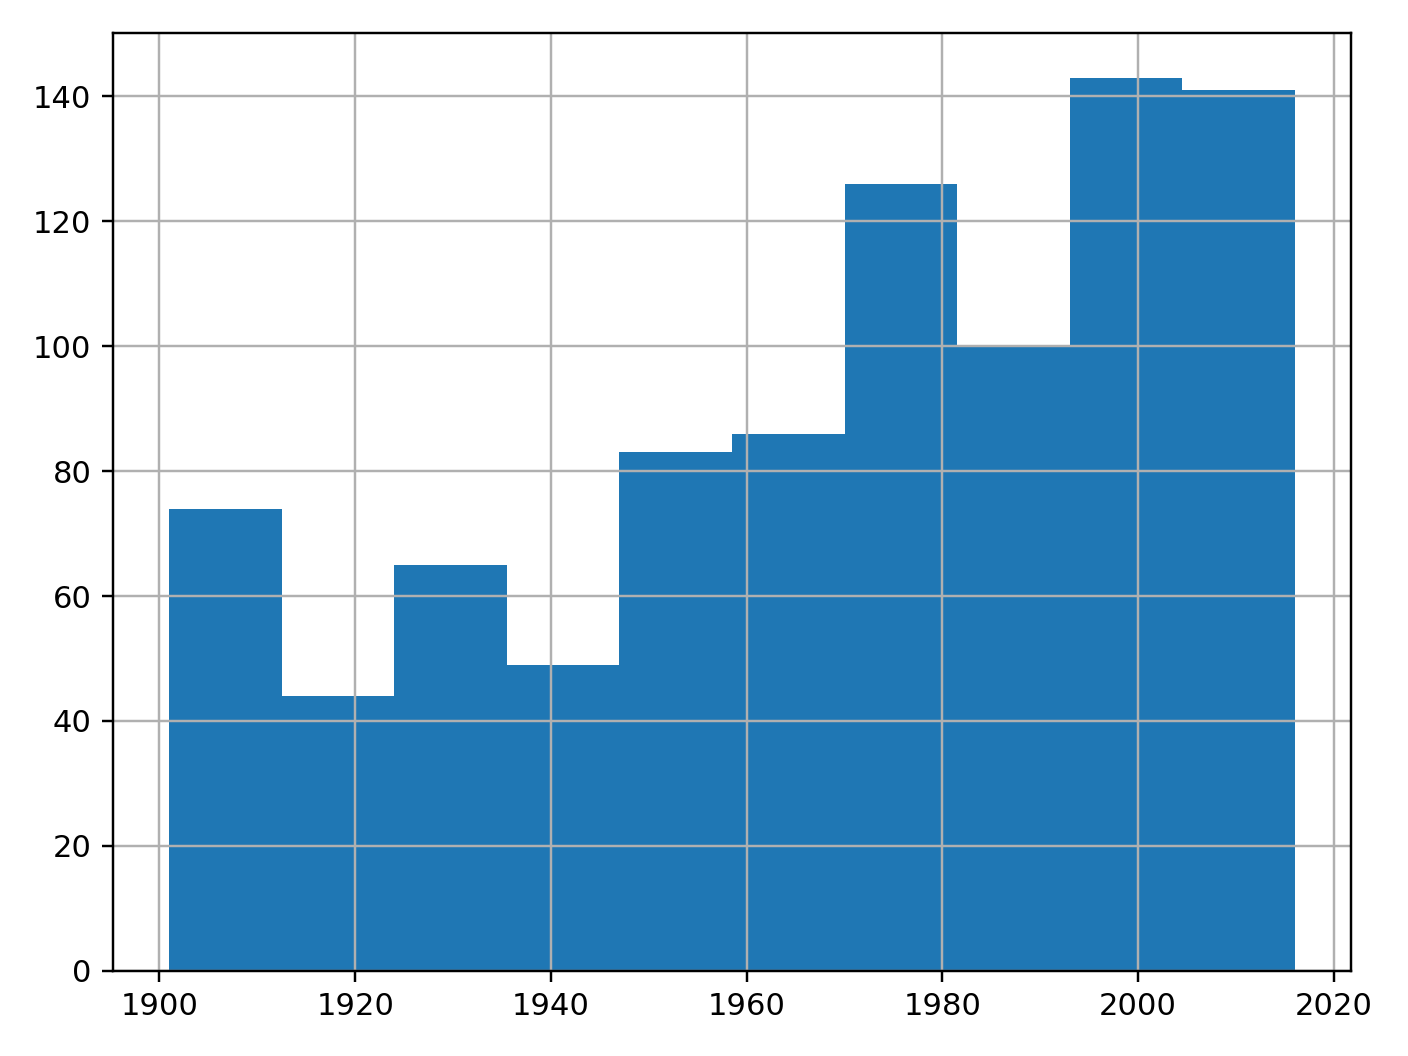

In [7]:
ax = df.year.hist()
plt.tight_layout();

The least were awarded around 1920.

# Problem 4

Use groupby method to printout the number of prizes awarded to each category. Which categroy has the most prizes?

In [8]:
df
category_counts = df.groupby('category').size()
category_counts_highlow = category_counts.sort_values(ascending=False)
print("Number of prizes per category:")
print(category_counts_highlow)

Number of prizes per category:
category
Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
dtype: int64


In [9]:
most_prizes = category_counts_highlow.index[0]
print('Most prizes:', most_prizes)

Most prizes: Medicine


# Problem 5

Find percentage of the prizes were awarded to 1, 2, 3, and 4 people? Meaning what percentage of 1/1, 1/2, 1/3, and 1/4 prize_shares are there?

In [21]:
prize_shares = df['prize_share'].value_counts()
total_prizes = len(df)

percentage_prizes = (prize_shares/ total_prizes) * 100

print("Percentage of prizes awarded to each prize_share:")
print(percentage_prizes)

Percentage of prizes awarded to each prize_share:
1/1    37.760703
1/2    33.589462
1/3    22.063666
1/4     6.586169
Name: prize_share, dtype: float64


# Problem 6

Determine how many males and females won the prize. Does the sum of male and female prizes add up to the total entries? If not, why?

On the same graph make histograms for the numbber of males and females that won the prize each year. 

In [11]:
gender = df['sex'].value_counts()
print("Number of males and females who won the prize:")
print(gender)

total_entries = len(df)

if gender.sum() == total_entries:
    print("It adds up to the total entries.")
else:
    print("No, it doesn't add up")

Number of males and females who won the prize:
Male      836
Female     49
Name: sex, dtype: int64
No, it doesn't add up


It does not add up, as shown in the code, because some of the entries for sex are missing in the original file.

<IPython.core.display.Javascript object>


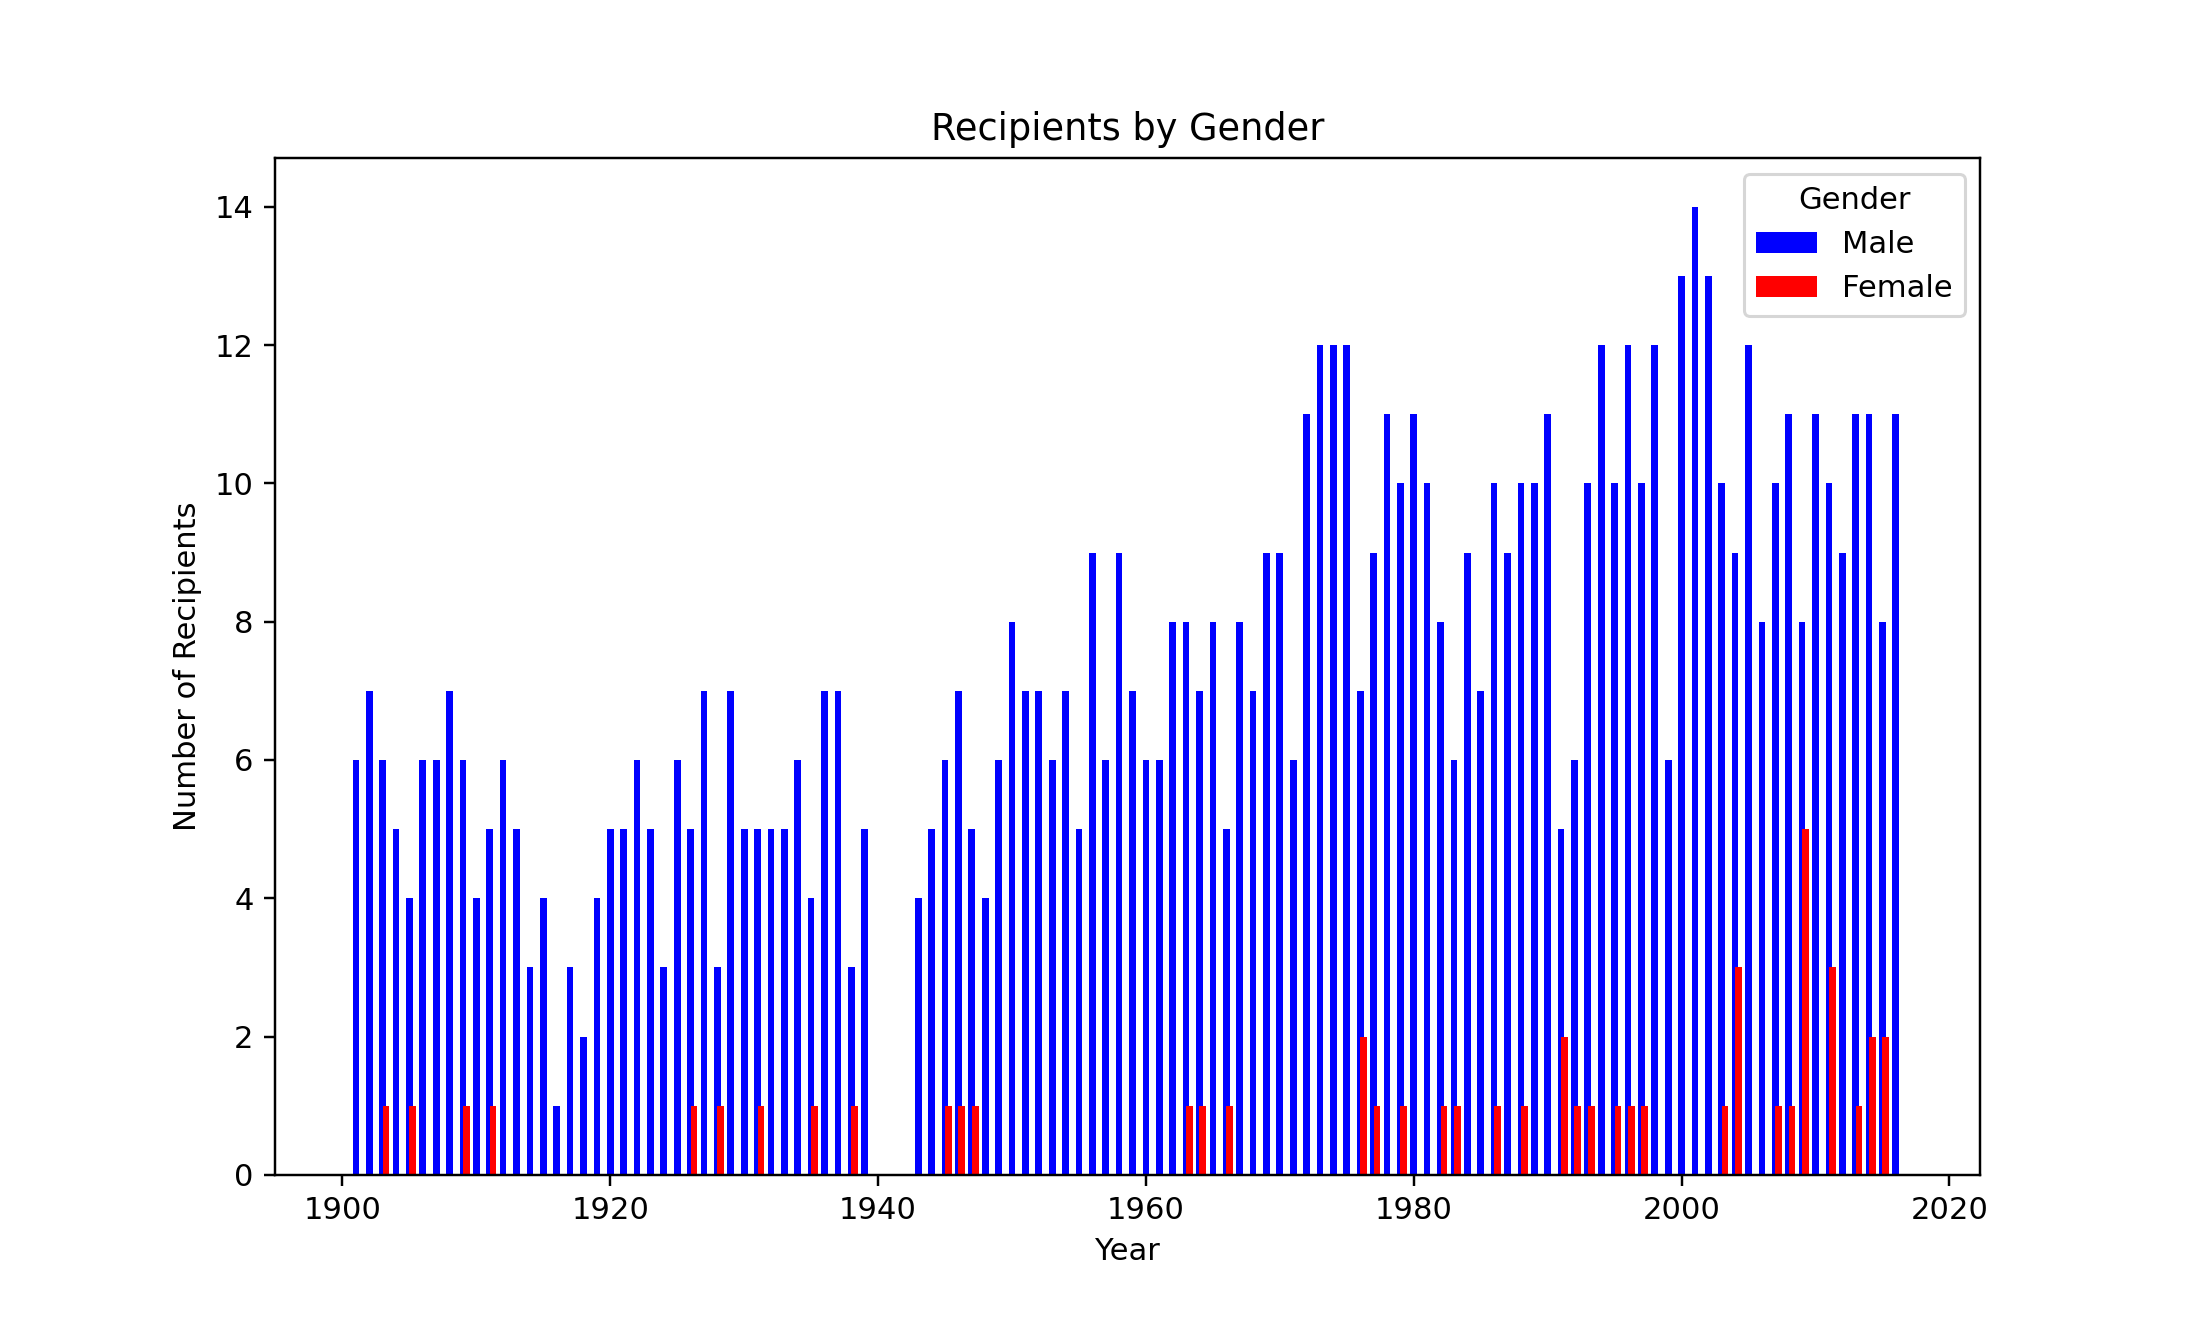

In [12]:
gender_year_counts = df.groupby(['year', 'sex']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))

males = gender_year_counts['Male']
females = gender_year_counts['Female']
years = gender_year_counts.index

ax.bar(years, males, width=0.5, label='Male', align='center', color = 'blue')
ax.bar(years, females, width=0.5, label='Female', align='edge', color = 'red')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Recipients')
ax.set_title('Recipients by Gender')
ax.legend(title='Gender')
plt.show()

# Problem 7

How many prizes were won by those whose birth country was United States of America?

In [13]:
usa_birth_count = len(df[df['birth_country'] == 'United States of America'])

print('Prizes to USA:', (usa_birth_count))

Prizes to USA: 259


# Problem 8

Determine the age that each of the prize winners was when they won the prize. Find the youngest and oldest to win the prize. Find the mean age to win the prize, and the standard deviation of it. Make a histogram of the age each person was when they won the prize.

### Hint: You can use Pandas DatetimeIndex method to extract the year from the date format yyyy-mm-dd
> pd.DatetimeIndex(date).year

Where *date* is given in a formate like year-month-day, the above will returen the year, hence the *.year* in the call above. Use 'shit+tab' on pandas.DatetimeIndex to learn more.

In [14]:
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['year'] = pd.to_datetime(df['year'], format='%Y')

df['age'] = (df['year'] - df['birth_date']).dt.days // 365

youngest_winner = df[df['age'] == df['age'].min()]
oldest_winner = df[df['age'] == df['age'].max()]

mean_age = df['age'].mean()
std_age = df['age'].std()

print(f"Youngest Nobel Prize Winner:\n{youngest_winner[['full_name', 'age']]}")
print(f"\nOldest Nobel Prize Winner:\n{oldest_winner[['full_name', 'age']]}")
print(f"\nMean Age to Win the Prize: {mean_age} years")
print(f"Standard Deviation of Age: {std_age} years")

Youngest Nobel Prize Winner:
            full_name   age
885  Malala Yousafzai  16.0

Oldest Nobel Prize Winner:
          full_name   age
793  Leonid Hurwicz  89.0

Mean Age to Win the Prize: 58.48584371460929 years
Standard Deviation of Age: 12.403211357551019 years


<IPython.core.display.Javascript object>


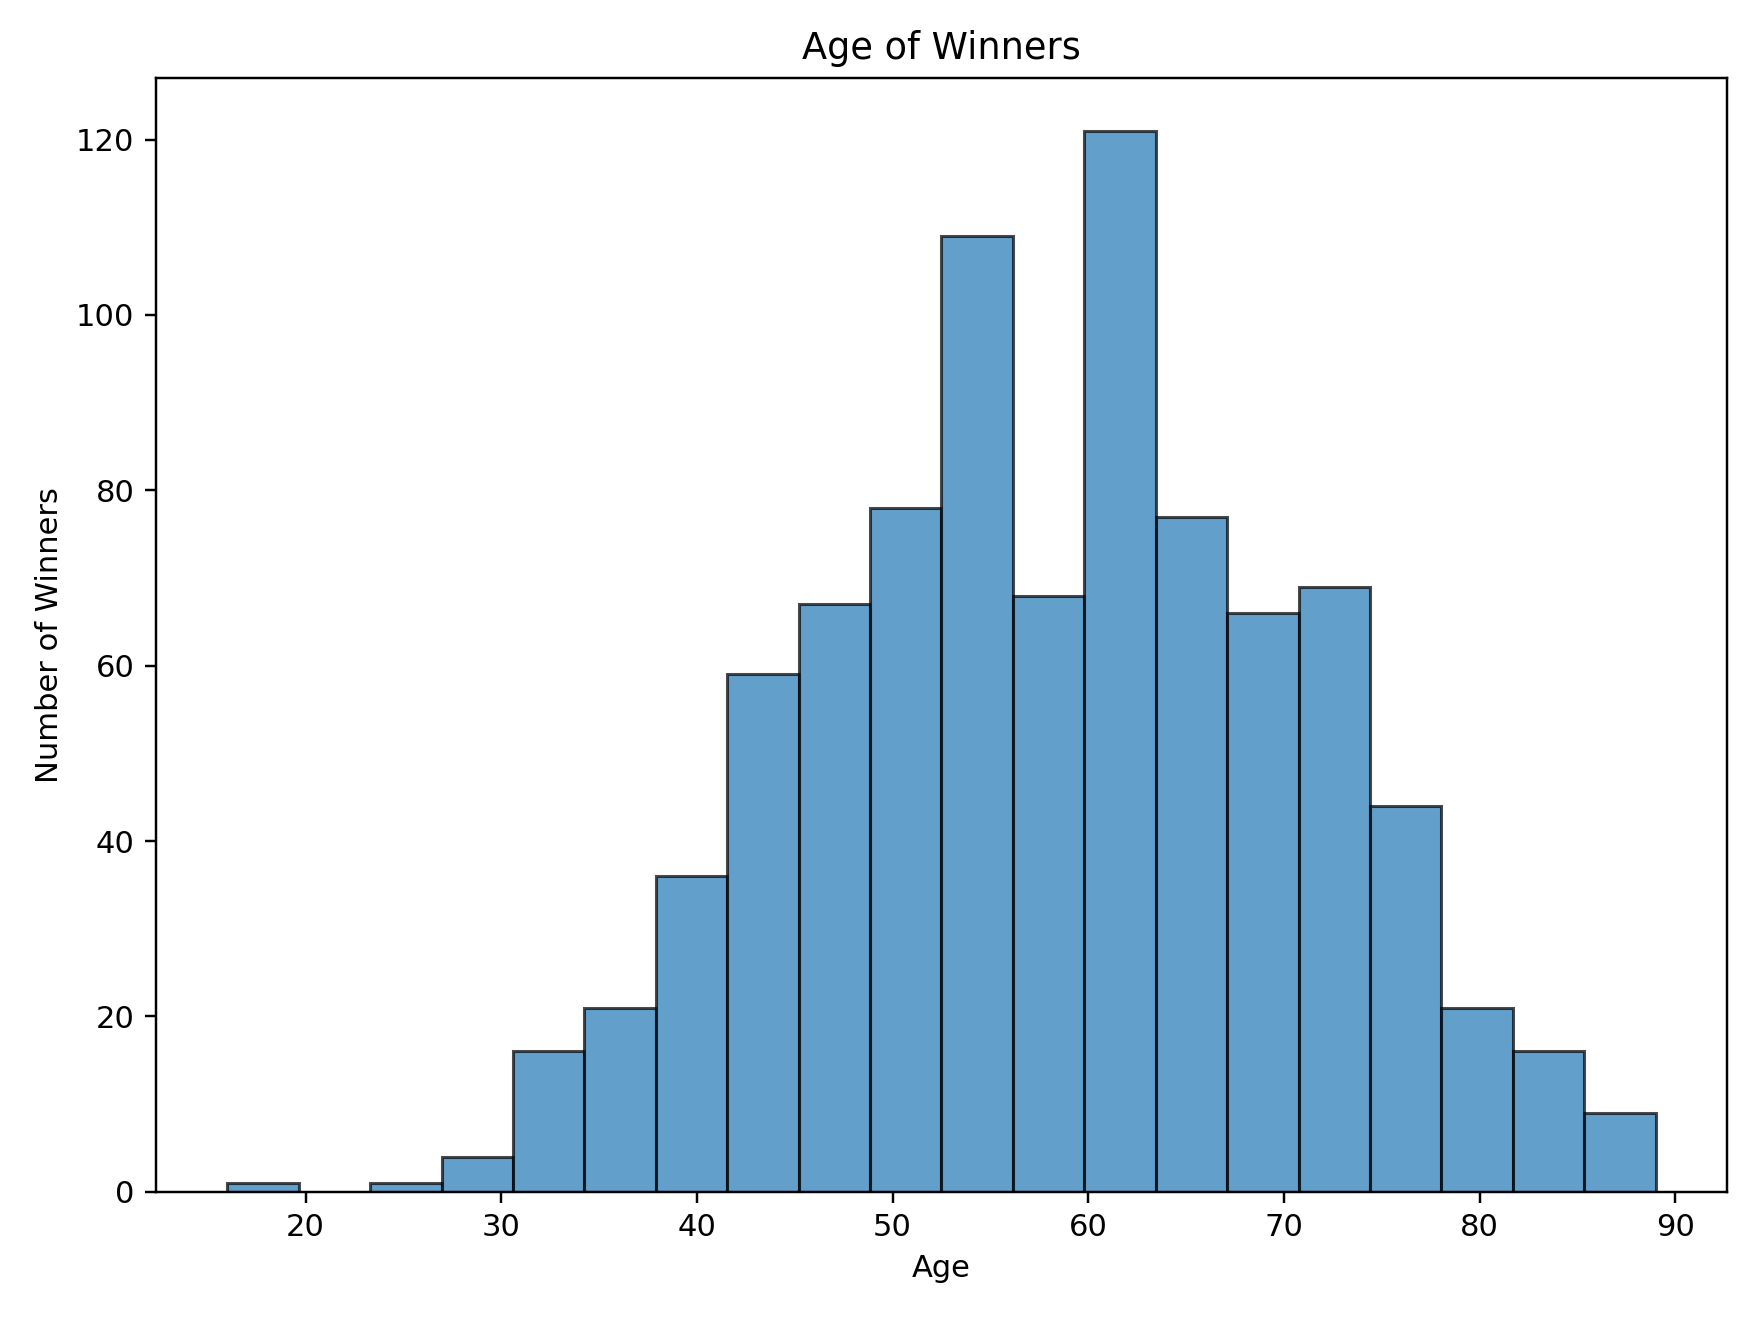

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Age of Winners')
plt.xlabel('Age')
plt.ylabel('Number of Winners')
plt.tight_layout()

# Problem 9

Make a copy of the current DataFrame. Then drop the column *lauret_id* from the copied DataFrame (do this inplace so this column is gone).

In [17]:
df_new = df.copy()
df_new.drop(columns=['laureate_id'], inplace=True)
df_new

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,48.0
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,61.0
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,46.0
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,72.0
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,70.0
907,2016-01-01,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,64.0
908,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,81.0
909,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,64.0


# Problem 10

Add the age column you calculated in Problem 8 to the DataFrame.

In [19]:
df_new['Age'] = (df['age'])
df_new            

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age,Age
0,1901-01-01,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,48.0,48.0
1,1901-01-01,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,61.0,61.0
2,1901-01-01,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,46.0,46.0
3,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,72.0,72.0
4,1901-01-01,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,78.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016-01-01,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,70.0,70.0
907,2016-01-01,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,64.0,64.0
908,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,81.0,81.0
909,2016-01-01,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,64.0,64.0
